# Análise e Determinação da Persona da CT Junior
## Setor de Tecnologia
Abaixo se encontra o código, a explicação, as visualizações a respeito dos dados dos clientes passados da CT Junior, e a interpretação dos dados.

- Primeiro, devemos abrir o arquivo `persona_tec.csv`, que contém todos os dados: 

In [2]:
import csv
import matplotlib.pyplot as plt
import persona as per

with open("persona_tec.csv", "r") as persona_tec:
    csv_reader = csv.reader(persona_tec)
    #-Skip header row
    next(csv_reader)  
    
    gender = list()
    has_company = list()
    company_area = list()
    services = list()
    sources = list()
    social_capital = list()
    prices = list()
    avg_price = list()
    
    #-For every client:
    for row in csv_reader:
        client = row[0]
        client = client.split(";")
        #-Now, 'client' is a list of the client data
        #-Gender
        if client[2] == "Masculino":
            gender.append(0)
        elif client[2] == "Feminino":
            gender.append(1)
        #-Has Company
        if (int(client[5]) == 1) or (int(client[5]) == 2):
            has_company.append(True)
        elif int(client[5]) == 0:
            has_company.append(False)
        #-Company Area
        company_area.append(client[7])
        #-Service
        services.append(client[10].split("+"))
        #-Source
        sources.append(client[11])
        #- Prices
        prices.append(client[12].split("+"))
        #-Social Capital
        social_capital.append(int(client[14]))
        #-Average Price for Client
        avg = int(client[16]) / int(client[15])
        avg_price.append(avg)
    #-Zip the data into tuples
    data = zip(gender, has_company, company_area, services, prices, sources, social_capital, avg_price, strict=True)
    data = list(data)
    for client in data:
        print(client)
        

(0, True, 'Capital_de_Risco', ['Website'], ['2200'], 'Indicacao', 100000, 2200.0)
(0, True, 'Consultoria', ['Website'], ['1500'], 'Ativa', 0, 1500.0)
(0, True, 'Associacao', ['Website'], ['775'], 'Passiva', 0, 775.0)
(1, True, 'Associacao', ['Website'], ['1600'], 'Passiva', 0, 1600.0)
(1, True, 'Construcao', ['Website'], ['2400'], 'Passiva', 80000, 2400.0)
(0, True, 'Engenharia', ['Website'], ['1395'], 'Passiva', 10000, 1395.0)
(1, True, 'Varejo', ['Website', 'Sistema'], ['2500', '2500'], 'Ativa', 29500000, 2500.0)
(0, False, 'NULL', ['Website'], ['2500'], 'Outro', 0, 2500.0)
(0, True, 'ONG', ['Website', 'Prototipo'], ['2700', '2300'], 'Facebook', 210000, 2500.0)
(1, True, 'Orgao Sem Fins Lucrativos', ['Sistema'], ['4000'], 'Passiva', 0, 4000.0)
(0, True, 'Comercio', ['Prototipo', 'Sistema'], ['1000', '8500'], 'Passiva', 550000, 4750.0)
(0, False, 'NULL', ['Website', 'Landing Page', 'Landing Page', 'Landing Page', 'Landing Page', 'Landing Page'], ['1500', '200', '200', '200', '200', '2

Agora, temos em mãos somente os dados necessários, já limpos.
Para o próximo passo, podemos de fato começar a trabalhar com esses dados.

## Análise Descritiva: Medidas de Tendência Central

Vamos calcular algumas medidas para obter a persona.

### Ticket Médio

Calculado por:

$$Ticket Medio = \frac{Faturamento}{N° de Clientes}$$

In [3]:
average_ticket_price = 0.0
for client in data:
    average_ticket_price += client[7]
average_ticket_price /= len(data)
average_ticket_price = round(average_ticket_price, 2)
print(f"O ticket médio de Tecnologia é: R${average_ticket_price}")

O ticket médio de Tecnologia é: R$2218.33


Assim, podemos concluir que o **Ticket Médio** é aprox. `R$2218,00`.

### Mediana do Capital Social

Visto que temos valores extremos, devemos usar a mediana ao invés da média, visto que a mediana é mais resistente contra valores extremos e distribuições distorcidas (*skewed distribution*).

A mediana é calculada pela média dos valores centrais de uma sequência de elementos em *rol* (ordem) caso o n° de elementos seja **ímpar**, e é o próprio elemento central caso seja **par**.

In [19]:
median:float
valid_social_capital = list()
for client in data:
    if client[6] == 0:
        continue
    else:
        valid_social_capital.append(client[6])
median = per.calc_median(valid_social_capital)
median = round(median)
print(f"A mediana do capital social das empresas que contrataram a CT Junior é: {median}.")

A mediana do capital social das empresas que contrataram a CT Junior é: 380000.


Assim, podemos concluir que a mediana do capital social das empresas que contrataram a CT Junior é `R$380.000,00`

## Análise Descritiva: Visualização

Fazendo alguns gráficos, podemos ver melhor a distribuição dos valores e o que eles significam.

### Empresas x Pessoas Físicas

Vamos observar a distribuição de empresas e pessoas físicas que nos contrataram.

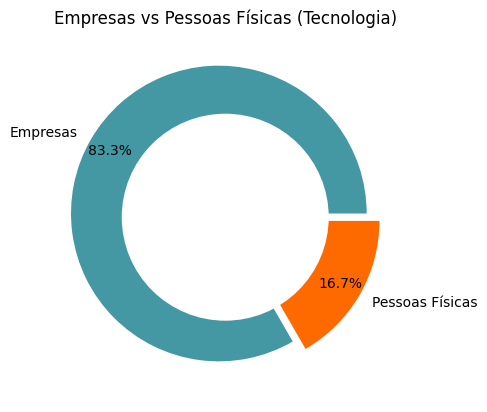

In [4]:
distribution = [0, 0]
label = list()
colors = list()

for client in data:
    if client[1] == True:
        distribution[0] += 1
    elif client[1] == False:
        distribution[1] += 1
    
#-Setting labels for items in Chart
label = ['Empresas','Pessoas Físicas']

#-colors
colors = ['#4398A4', '#FF6A00']

#-explosion
explode = (0.05, 0.05)

#-Pie Chart
plt.pie(distribution, colors=colors, labels=label, autopct='%1.1f%%', pctdistance=0.85, explode=explode)

#-draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

#-Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

#-Adding Title of chart
plt.title('Empresas vs Pessoas Físicas (Tecnologia)')

#-Displaying Chart
plt.show()

Com esse gráfico, podemos concluir que a grande maioria dos nosso clientes de tecnologia são **pessoas jurídicas**, e não pessoas físicas, com uma diferença aproximada de `83%` para empresas e `17%` para pessoas físicas.

### Distribuição das Fontes

Observe a distribuição das fontes dos nossos serviços vendidos.

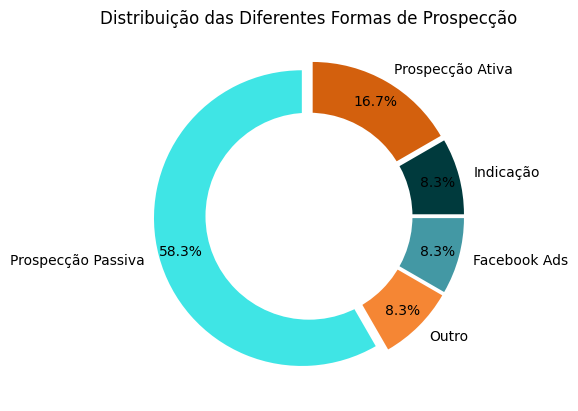

In [7]:
src_distribution = dict()
label = list()
colors = list()

for client in data:
    if client[5] in src_distribution.keys():
        src_distribution[client[5]] += 1
    else:
        src_distribution[client[5]] = 1

#-Setting labels for items in Chart
label = ['Indicação', 'Prospecção Ativa', 'Prospecção Passiva', 'Outro', 'Facebook Ads']

#-colors
colors = ['#003A3D', '#D3600D', '#3FE5E5', '#F58634', '#4398A4']

#-explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

#-Pie Chart
plt.pie(src_distribution.values(), colors=colors, labels=label, autopct='%1.1f%%', pctdistance=0.85, explode=explode)

#-draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

#-Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

#-Adding Title of chart
plt.title('Distribuição das Diferentes Formas de Prospecção')

#-Displaying Chart
plt.show()

A visualização mostra a distribuição das nossas fontes, isto é, de onde vêm nossos clientes.

### Distribuição dos Serviços

Observe a distribuição dos nossos serviços vendidos.

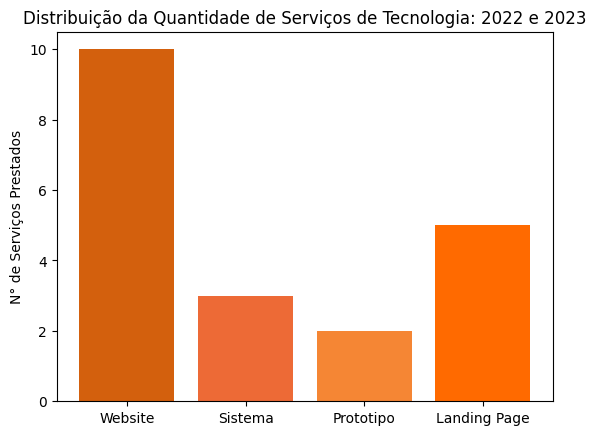

In [13]:
services = dict()
for client in data:
    for service in client[3]:
        if service not in services.keys():
            services[service] = 1
        else:
            services[service] += 1
diff_services = list(services.keys())
service_amount = list(services.values())

#-Colors 
colors = ["#D3600D", "#ED6A36", "#F58634", "#FF6A00"]

#-Plot the bars accordinly to the y-coordinates (service_amount) and x-coordinates
plt.bar(range(len(diff_services)), service_amount, color=colors, width=0.8)

#-Adding chart title
plt.title("Distribuição da Quantidade de Serviços de Tecnologia: 2022 e 2023")

#-Naming the y-axis
plt.ylabel("N° de Serviços Prestados")

#-Naming the bars accordinly
plt.xticks(range(len(diff_services)), diff_services)

#-Displaying chart
plt.show()

Esse gráfico nos permite ver que o serviço mais requisitado é o Website, e logo depois Landing Pages, e, seguida sistemas. Porém, seria essa uma visualização representativa do faturamento que cada serviço traz para a CT Junior?

- Observação:

Dos protótipos no gráfico, um é um **protótipo de sistema** e o outro é um **protótipo de aplicativo**.  

### Ticket Médio por Serviço

A seguir está a visualização do ticket médio por cada serviço:

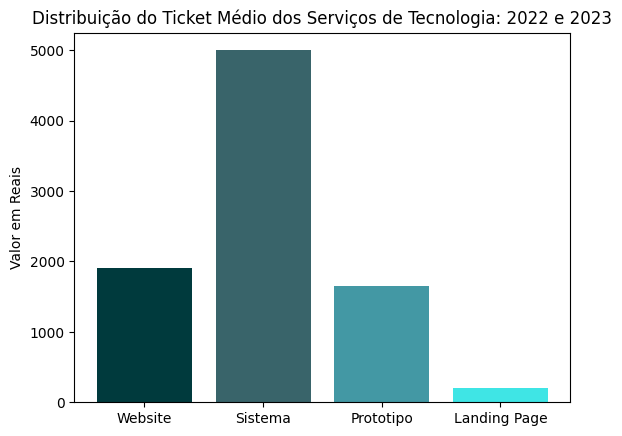

In [11]:
total_price_per_service = dict()
#-For every client
for client in data:
        #-For every service in the client[3] list
        for item, price in zip(client[3], client[4]):   
            #-If the service is in the 'total_price_per_service' dict
            if (item in total_price_per_service):
                total_price_per_service[item] += int(price)
            #-If the service is not in the dict
            elif item not in total_price_per_service:
                total_price_per_service[item] = int(price)

#-Zip the total sum for each product price, and the amout of times they appear
total_price_and_count = list(zip(total_price_per_service.values(), services.values()))

avg_price_per_service = list()

#-For each tuple, append the average price per service
for item in total_price_and_count:
    avg_price_per_service.append(round(item[0]/item[1]))

#diff_services = list(services.keys())
avg_price = avg_price_per_service

#-Colors 
colors = ["#003A3D", "#39646A", "#4398A4", "#3FE5E5"]

#-Plot the bars accordinly to the y-coordinates (service_amount) and x-coordinates
plt.bar(range(len(diff_services)), avg_price, color=colors, width=0.8)

#-Adding chart title
plt.title("Distribuição do Ticket Médio dos Serviços de Tecnologia: 2022 e 2023")

#-Naming the y-axis
plt.ylabel("Valor em Reais")

#-Naming the bars accordinly
plt.xticks(range(len(diff_services)), diff_services)

#-Displaying chart
plt.show()

Após essa visualização, fica notório que o serviço de **maior rendimento é o Sistema**, e o de **menor rendimento é a Landing Page**.  

Apesar disso, um fator que afeta a análise é o **tempo de produção**, e o **n° médio de desenvolvedores alocados por serviço. Infelizmente, não temos dados para essa análise**.

## Conclusões

Podemos fazer as seguintes conclusões a partir dos dados analisados:

- Mais de **80%** dos contratantes de serviços de tecnologia são Empresas (Pessoa Jurídica);

- A mediana do capital social é cerca de `R$380.000,00`;

- O serviço mais requisitado é o **Website**, embora seja o segundo mais rentável;

- O **Sistema** é o serviço com maior ticket médio;

- A **Landing Page** é o produto com menor rendimento, mas é o segundo serviço mais requisitado;

- O ticket médio de tecnologia é cerca de `R$2.218,00`.


### Insights

1) Primeiro:

Visto que a maioria dos nossos clientes são pessoas jurídicas, nossa abordagem com campanhas, posts e páginas devem ser ligeiramente diferentes. 

*Em quais aspectos?*

Uma campanha qualquer, para empresas ou pessoas físicas, deve ressaltar confiabilidade e qualidade. Porém, para pessoas físicas, qualidades mais atrativas são a **segurança**, os **preços baixos** e **contato pessoal**. 

Já uma campanha para empresas, os atrativos são **estabilidade**, **ampliação da possibilidade de lucro**, o **melhoramento da imagem**, e **circunspecção** (caráter de quem observa com cuidado todos os âmbitos de uma questão).

Por conta disso, nossos serviços de tecnologia devem ser ofertados com foco nos atrativos para uma empresa, e não com os atrativos de uma pessoa física. É uma diferença sutil, mas um conjunto de diferenças sutis resulta numa grande diferença.

Visto que a mediana do Capital Social das empresas que fecham conosco é de `R$380.000`, podemos afirmar que a maioria das empresas que nos contratam são de baixo/médio porte (MPEs). 

Isso significa que as empresas que nos contratam são negócios novos/em crescimento, e por isso têm menos capital para investir nos nossos serviços.

Isso compactua com a venda dos nossos serviços: o que mais vendemos são Websites, que tem um preço médio de cerca de 2000 reais na CT Junior, e empresas de grande porte, em sua maioria, já possuem websites.

Segundo o site [Data Sebrae](https://datasebrae.com.br/), cerca de 20% dos empresários de MPE's incluídos na pesquisa encontram sua maior dificuldade em conseguir maiores lucros e aumentar a competitividade de seu negócio.

![Sebrae-Dados-Dificuldades](img/dificuldades-mpe-sebrae.png)

Esses dados, em conjunto com os dados revelados pela persona, **podem ser usados como argumentos no Marketing e nas Vendas dos nossos serviços de tecnologia**.

Para ver todos os dados da pesquisa, [clique aqui](https://datasebrae.com.br/wp-content/uploads/2022/08/Perfil-da-ME-e-EPP-2022.pdf).

2) Segundo:

De acordo com alguns sites de marketing digital (**fonte não confirmada**), os preços de LP's variam com a amplitude de `R$497,00 - R$7.100,00`. Isso significa que, se os dados estiverem corretos, nossos preços atuais de LP são cerca de **60%** mais baratos do que o **preço mínimo**.

Por conta disso, nas próximas vendas, o preço de uma LP devem ser pelo menos **2,5 vezes maior**.